In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SMARTPHONE RETAIL OUTLET SALE DATA.csv")

In [3]:
print(df.head())

         Date        F.Y  QUARTER     P_NO PAYMENT TYPE TYPE OF PRODUCT   
0  01-04-2018  2018-2019        1   P/A/36         CASH       ACCESSORY  \
1  01-04-2018  2018-2019        1   P/A/47         CASH       ACCESSORY   
2  01-04-2018  2018-2019        1  P/M/A34       CREDIT          MOBILE   
3  01-04-2018  2018-2019        1  P/M/A42       CREDIT          MOBILE   
4  01-04-2018  2018-2019        1  P/M/A42        DEBIT          MOBILE   

   Quantity    Price    Amount TYPE OF ACCESSORY/MOBILE  
0         1  2042.38   2542.38                    COVER  
1         1  2042.38   2118.64         WIRELESS HEADSET  
2         1  2042.38  13303.58             BUDGET PHONE  
3         1  2042.38  51696.43           FLAGSHIP PHONE  
4         1  2042.38  51696.42           FLAGSHIP PHONE  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6421 non-null   object 
 1   F.Y                       6421 non-null   object 
 2   QUARTER                   6421 non-null   int64  
 3   P_NO                      6420 non-null   object 
 4   PAYMENT TYPE              6421 non-null   object 
 5   TYPE OF PRODUCT           6421 non-null   object 
 6   Quantity                  6421 non-null   int64  
 7   Price                     6421 non-null   float64
 8   Amount                    6421 non-null   float64
 9   TYPE OF ACCESSORY/MOBILE  6421 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 501.8+ KB
None


In [5]:
print(df.describe())

           QUARTER     Quantity          Price         Amount
count  6421.000000  6421.000000    6421.000000    6421.000000
mean      2.249338     1.058246   18295.175739   19255.968355
std       1.000452     0.949686   19855.194755   20608.895584
min       1.000000     1.000000     410.710000     915.260000
25%       1.000000     1.000000    5026.780000    5892.860000
50%       2.000000     1.000000   13776.780000   14284.820000
75%       3.000000     1.000000   20919.640000   21419.640000
max       4.000000    30.000000  104767.860000  230803.570000


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [7]:
product_sales = df.groupby(['TYPE OF PRODUCT', 'TYPE OF ACCESSORY/MOBILE']).agg({
    'Quantity': 'sum',
    'Amount': 'sum'
}).reset_index()

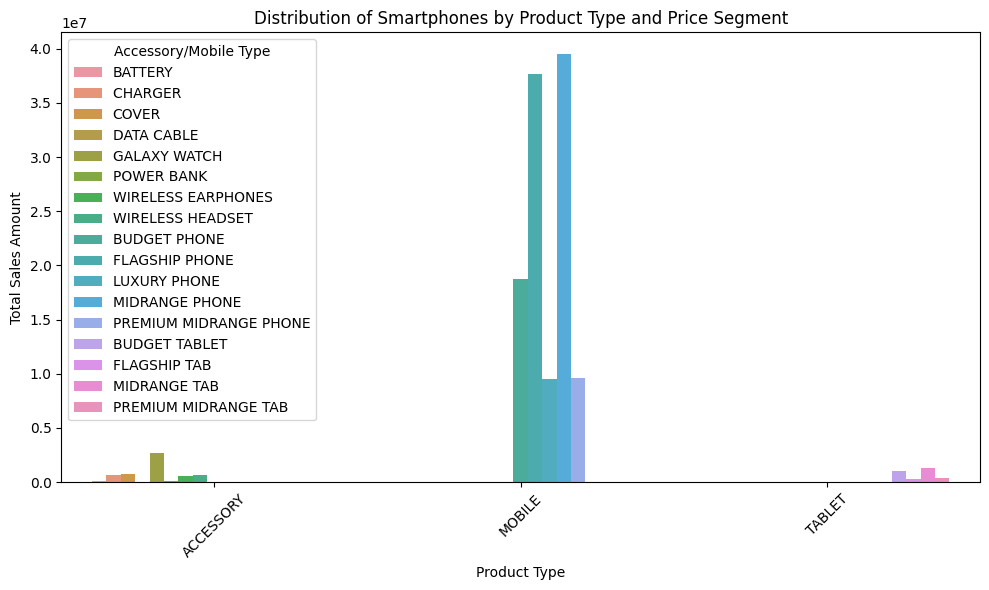

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='TYPE OF PRODUCT', y='Amount', hue='TYPE OF ACCESSORY/MOBILE')
plt.title('Distribution of Smartphones by Product Type and Price Segment')
plt.xlabel('Product Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Accessory/Mobile Type')
plt.tight_layout()
plt.show()


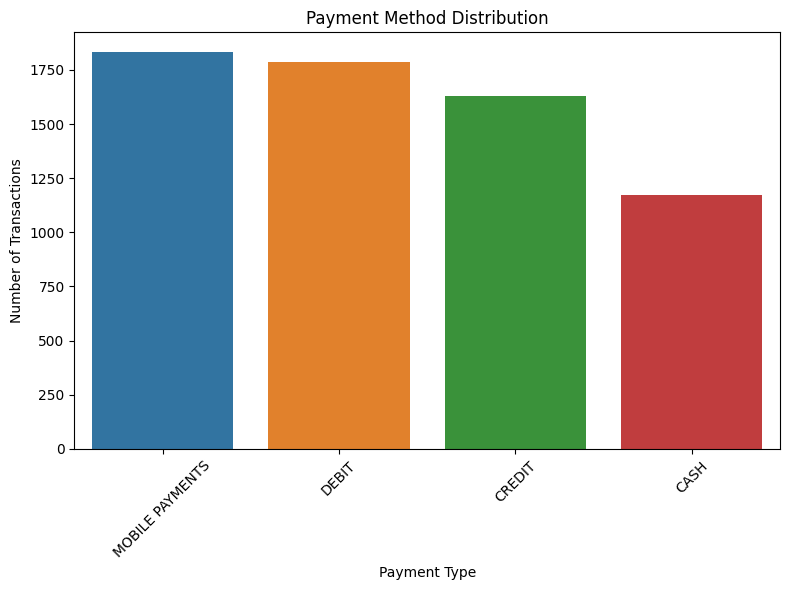

In [9]:
payment_distribution = df['PAYMENT TYPE'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

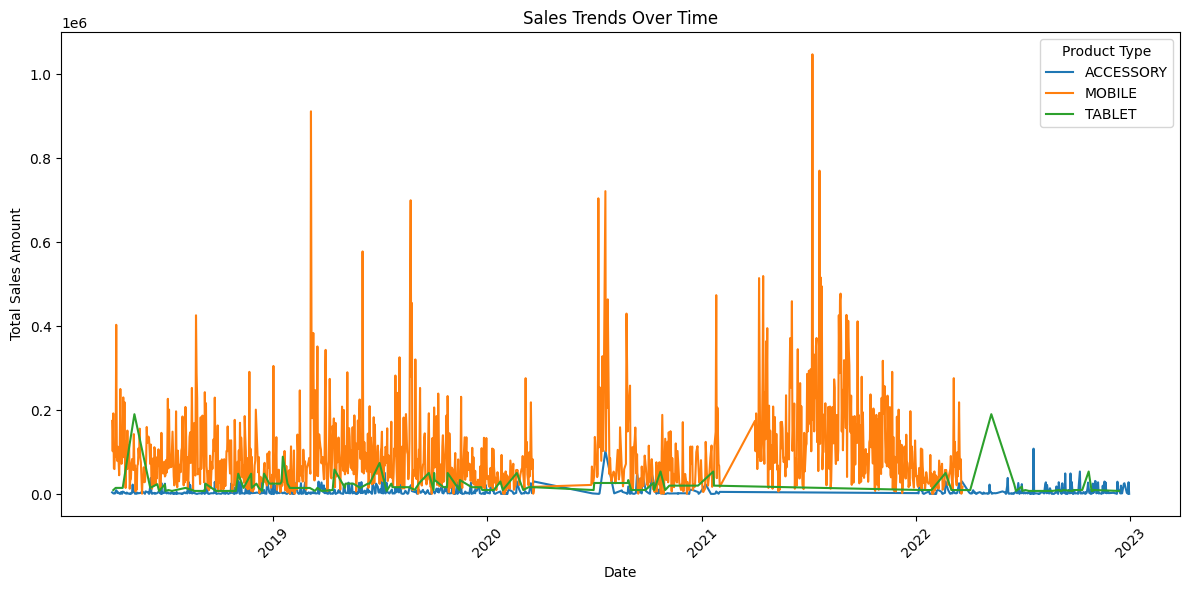

In [10]:
sales_over_time = df.groupby(['Date', 'TYPE OF PRODUCT']).agg({
    'Quantity': 'sum',
    'Amount': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Amount', hue='TYPE OF PRODUCT')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

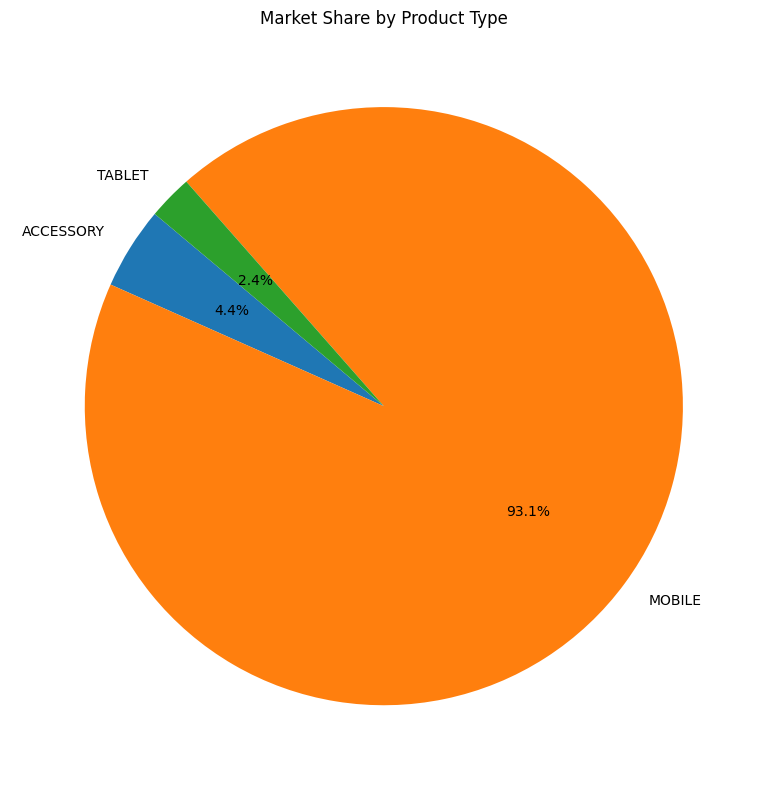

In [11]:
product_type_share = df.groupby('TYPE OF PRODUCT')['Amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(product_type_share, labels=product_type_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Product Type')
plt.tight_layout()
plt.show()


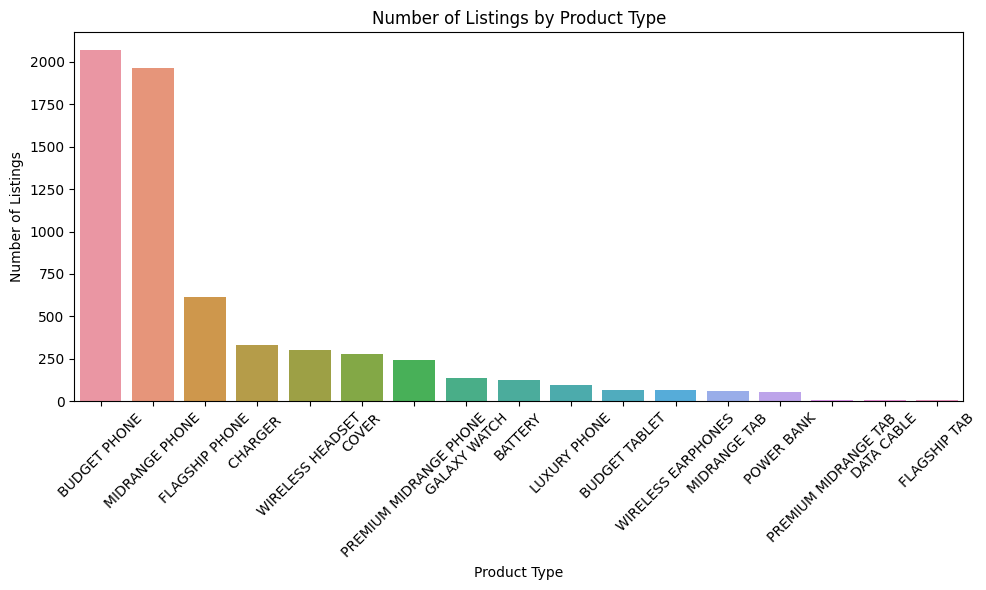

In [12]:
product_listings = df['TYPE OF ACCESSORY/MOBILE'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_listings.index, y=product_listings.values)
plt.title('Number of Listings by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()